In [1]:
# libraries

# !pip install spacy-transformers
# import spacy
# import spacy_transformers
# spacy.cli.download("en_core_web_trf")

     -------------------------------------- 343.4/343.4 kB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 7.9/7.9 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 187.5/187.5 kB ? eta 0:00:00
     ---------------------------------------- 12.5/12.5 MB 8.7 MB/s eta 0:00:00
     -------------------------------------- 192.3/192.3 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 483.7/483.7 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.6 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 kB ? eta 0:00:00
     ------------------------------------- 381.9/381.9 kB 12.0 MB/s eta 0:00:00
     -------------------------------------- 123.0/123.0 kB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 7.8 MB

ValueError: [E002] Can't find factory for 'curated_transformer' for language English (en). This usually happens when spaCy calls `nlp.create_pipe` with a custom component name that's not registered on the current language class. If you're using a Transformer, make sure to install 'spacy-transformers'. If you're using a custom component, make sure you've added the decorator `@Language.component` (for function components) or `@Language.factory` (for class components).

Available factories: attribute_ruler, tok2vec, merge_noun_chunks, merge_entities, merge_subtokens, token_splitter, doc_cleaner, parser, beam_parser, lemmatizer, trainable_lemmatizer, entity_linker, entity_ruler, tagger, morphologizer, ner, beam_ner, senter, sentencizer, spancat, spancat_singlelabel, span_finder, future_entity_ruler, span_ruler, textcat, textcat_multilabel, transformer, en.lemmatizer

In [3]:
import numpy as np
import pandas as pd
import re
# import model_evaluation_utils as meu

import warnings
warnings.filterwarnings("ignore")

In [23]:
data = pd.read_csv('CNN_Articles.csv', index_col= 0)
data.head()

,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
0,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
2,"Stephanie Bailey, CNN",2021-05-12T07:52:09Z,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16T02:51:30Z,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
4,"Paul R. La Monica, CNN Business",2022-03-15T09:57:36Z,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."


---

# Preprocessing and testing

Main aim for the project :

- Clean the descriptions and prepare everything for NLP tasks
- use the keywords and description column to get the overall sentiment of the text, average

In [ ]:
data['keywords'].apply(len)

In [ ]:
data['keywords_length']

0       100
1       100
2        86
3        63
4        88
       ... 
9303    108
9304     75
9305     75
9306    102
9307    102
Name: keywords_length, Length: 9308, dtype: int64

In [ ]:
data['description'].apply(len)

0       117
1       117
2       204
3       167
4       135
       ... 
9303    257
9304    354
9305    354
9306    261
9307    261
Name: description, Length: 9308, dtype: int64

In [ ]:
data['text'].apply(len)

0       12361
1       12361
2        5815
3        3419
4        3299
        ...  
9303     9472
9304    12859
9305    12859
9306     5249
9307     5249
Name: text, Length: 9308, dtype: int64

In [ ]:
data['alternative_headline'].apply(len)

0        87
1        87
2        64
3        51
4        71
       ... 
9303    106
9304     65
9305     65
9306     73
9307     73
Name: alternative_headline, Length: 9308, dtype: int64

In [24]:
to_ner = data.columns[5:]

In [ ]:
import spacy

spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
row_check = data.loc[[0]]
row_check

,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
0,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."


In [ ]:
import re

def find_words_matching_pattern(text):
    pattern = r'\b[A-Z][a-zA-Z]*\b'
    # Compile the regex pattern
    regex_pattern = re.compile(pattern)

    # Use findall to find all matches in the text
    matches = regex_pattern.findall(text)

    print(matches)

    return matches

# Example usage:
text = "Hello World, Python is awesome. Welcome to the programming world!"
pattern = r'\b[A-Z][a-zA-Z]*\b'  # Example pattern for words starting with a capital letter

matched_words = find_words_matching_pattern(text)
print(matched_words)

['Hello', 'World', 'Python', 'Welcome']
['Hello', 'World', 'Python', 'Welcome']


In [ ]:
for i in to_ner:
  text = row_check[i][0]
  find_words_matching_pattern(text)

['There', 'TuSimple', 'CNN']
['The']
['There', 'TuSimple', 'CNN']
['There', 'TuSimple']
['CNN', 'Right', 'US', 'One', 'Among', 'San', 'Diego', 'TuSimple', 'Founded', 'TuSimple', 'US', 'China', 'Europe', 'Although', 'TuSimple', 'Navistar', 'US', 'Traton', 'Volkswagen', 'Europe', 'Photos', 'The', 'Yara', 'Birkeland', 'The', 'Norwegian', 'Click', 'Hide', 'Caption', 'Photos', 'Pictured', 'Oceanbird', 'Hide', 'Caption', 'Photos', 'It', 'Cities', 'Norwegian', 'Zeabuz', 'Hide', 'Caption', 'Photos', 'In', 'China', 'Maglev', 'Qingdao', 'China', 'Shandong', 'Province', 'July', 'It', 'Hide', 'Caption', 'Photos', 'Reaching', 'Hyperloop', 'Dutch', 'Hardt', 'Hyperloop', 'Europe', 'Hide', 'Caption', 'Photos', 'Hyperloop', 'Floating', 'Virgin', 'XP', 'Hide', 'Caption', 'Photos', 'Low', 'A', 'Flying', 'V', 'Delft', 'University', 'Technology', 'Netherlands', 'Dutch', 'KLM', 'Ultimately', 'Hide', 'Caption', 'Photos', 'Hydrogen', 'In', 'September', 'Airbus', 'It', 'ZEROe', 'Hide', 'Caption', 'Photos', 'In

In [ ]:
for i in to_ner:
  text = row_check[i][0]
  doc = nlp(text)
  for ent in doc.ents:
    print(ent.text, ent.label_)

TuSimple PERSON
CNN ORG
TuSimple PERSON
CNN ORG
TuSimple PERSON
CNN)Right GPE
US GPE
One CARDINAL
first ORDINAL
San Diego GPE
TuSimple PERSON
2015 DATE
TuSimple PERSON
about 2 million miles QUANTITY
70 CARDINAL
US GPE
China GPE
Europe LOC
TuSimple PERSON
two CARDINAL
Navistar ORG
US GPE
Traton GPE
Volkswagen ORG
Europe LOC
2024 DATE
The Yara Birkeland ORG
first ORDINAL
zero CARDINAL
first ORDINAL
two CARDINAL
Norwegian NORP
the end of the year DATE
1 CARDINAL
13 CARDINAL
Oceanbird NORP
90% PERCENT
2 CARDINAL
13 CARDINAL
Norwegian NORP
Zeabuz PRODUCT
3 CARDINAL
13 CARDINAL
China GPE
Maglev GPE
Qingdao GPE
China GPE
Shandong Province GPE
July 20 DATE
600 km per hour QUANTITY
4 CARDINAL
13 CARDINAL
up to 1,000 kilometers QUANTITY
620 miles QUANTITY
Hyperloop ORG
Dutch NORP
Hardt PERSON
Hyperloop PRODUCT
Europe LOC
2022.Hide Caption 5 CARDINAL
13 CARDINAL
Hyperloop PRODUCT
XP-2 PRODUCT
6 CARDINAL
13 CARDINAL
Delft GPE
University of Technology ORG
Netherlands GPE
Dutch NORP
KLM ORG
20% PERC

In [ ]:
for i in to_ner:
  text = row_check[i][0]
  doc = nlp(text)
  for ent in doc.ents:
    if ent.label_ == 'PERSON':
      print(ent.text, ent.label_)

TuSimple PERSON
TuSimple PERSON
TuSimple PERSON
TuSimple PERSON
TuSimple PERSON
TuSimple PERSON
Hardt PERSON
Steve Lee PERSON
Coradia PERSON
Cheng Lu PERSON
TuSimple PERSON
Lu PERSON
TuSimple PERSON
TuSimple PERSON
Lu PERSON
TuSimple PERSON
Lu PERSON
TuSimple PERSON
Lu PERSON
Lu PERSON
TuSimple PERSON
Lu PERSON
TuSimple PERSON
TuSimple PERSON
Lu PERSON
Lu PERSON
TuSimple PERSON
Lu PERSON
warehousesIn PERSON
warehousesSeven PERSON
Telexistence PERSON
warehousesAlthough PERSON
TuSimple PERSON
TuSimple PERSON
Grayson Brulte PERSON
TuSimple PERSON
TuSimple PERSON
Lu PERSON


In [1]:

import spacy
import spacy_transformers
spacy.cli.download("en_core_web_trf")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [2]:
nlp_trf = spacy.load("en_core_web_trf")

In [ ]:
for i in to_ner:
  text = row_check[i][0]
  doc = nlp_trf(text)
  for ent in doc.ents:
    if ent.label_ == 'PERSON':
      print(ent.text, ent.label_)


Steve Lee PERSON
Cheng Lu PERSON
Lu PERSON
Lu PERSON
Lu PERSON
Lu PERSON
Lu PERSON
Lu PERSON
Lu PERSON
Grayson Brulte PERSON
Lu PERSON


In [ ]:
labels_ner = set(['FAC','GPE','LOC','NORP','ORG','PRODUCT'])
labels_ner

{'FAC', 'GPE', 'LOC', 'NORP', 'ORG', 'PRODUCT'}

---
# Final Functions

In [25]:
to_ner

Index(['headline', 'description', 'keywords', 'alternative_headline', 'text'], dtype='object')

In [ ]:
# columns for ner : to_ner


def create_named_entites(value):
  doc = nlp_trf(text)
  people = []
  other = []
  for ent in doc.ents:
    if ent.label_ == 'PERSON':
        if ent.text not in people:
          people.append(ent.text)

    if ent.label_ in labels_ner:
      other.append(ent.text + ':' + ent.label_ )

    df['People'] = people
    df['Connected'] = other


In [ ]:
data_check = data.iloc[:10]

In [ ]:
data_check

,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
0,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
2,"Stephanie Bailey, CNN",2021-05-12T07:52:09Z,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16T02:51:30Z,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
4,"Paul R. La Monica, CNN Business",2022-03-15T09:57:36Z,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
5,"Paul R. La Monica, CNN Business",2022-03-15T09:57:36Z,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
6,"Paul R. La Monica, CNN Business",2022-03-15T09:57:36Z,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
7,Reuters,2022-03-15T11:27:02Z,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...
8,"Paul P. Murphy, CNN",2022-03-15T05:57:31Z,business,media,https://www.cnn.com/2022/03/15/europe/ukraine-...,Anti-war protester interrupts live Russian sta...,"A woman holding a sign reading ""NO WAR"" interr...","media, Anti-war protester interrupts live Russ...",Protester interrupts live Russian state news b...,(CNN Business)A woman holding a sign reading ...
9,"Oliver Darcy, CNN Business",2022-03-14T19:12:28Z,business,media,https://www.cnn.com/2022/03/14/media/fox-corre...,Benjamin Hall: Fox News correspondent hospital...,"Fox News correspondent Benjamin Hall, who had ...","media, Benjamin Hall: Fox News correspondent h...",Fox News correspondent hospitalized after bein...,New York (CNN Business)Fox News correspondent ...


In [ ]:
# def create_named_entities(row):
#     people = {}
#     other = []
#     text = row['full_text']

#     doc = nlp_trf(text)
#     for ent in doc.ents:
#         if ent.label_ == 'PERSON':
#             if ent.text not in people:
#                 people[ent.text] = 1
#             else:
#                 people[ent.text] += 1

#         if ent.label_ in labels_ner:
#             other.append(ent.text + ':' + ent.label_ )

#     return pd.Series({'People': people, 'Connected': other})

# for col in to_ner:
#     data_check[['People', 'Connected']] = data_check[col].apply(create_named_entities)

TypeError: ignored

In [ ]:
data_check['full_text'] = data_check['headline'] + data_check	['description'] + data_check['keywords'] + data_check['alternative_headline'] + data_check['text']

NameError: ignored

In [ ]:
def create_named_entities(row):
    people = {}
    other = []
    text = row['full_text']  # Assuming 'text' is the column containing the text data

    doc = nlp_trf(text)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            if ent.text not in people:
                people[ent.text] = 1
            else:
                people[ent.text] += 1

        if ent.label_ in labels_ner:
            check_connection = (ent.text + ':' + ent.label_ )
            if check_connection not in other:
              other.append(check_connection)

    return pd.Series({'People': people, 'Connected': other})

for col in to_ner:
    data_check[['People', 'Connected']] = data_check.apply(create_named_entities, axis=1)

KeyboardInterrupt: ignored

In [ ]:
data_check[['Connected']]

,Connected
0,"[TuSimple:ORG, TuSimple:ORG, TuSimple:ORG, US:..."
1,"[TuSimple:ORG, TuSimple:ORG, TuSimple:ORG, US:..."
2,"[Bioservo:ORG, Ironhand:PRODUCT, Swedish:NORP,..."
3,"[Hong Kong:GPE, Hong Kong:GPE, The Autonomous ..."
4,"[Russia:GPE, Brazil:GPE, Russia:GPE, India:GPE..."
5,"[Russia:GPE, Brazil:GPE, Russia:GPE, India:GPE..."
6,"[Russia:GPE, Brazil:GPE, Russia:GPE, India:GPE..."
7,"[Russian:NORP, EU:ORG, CNNThe European Union:O..."
8,"[Russian:NORP, Ukraine:GPE, CNNA:ORG, Russian:..."
9,"[Fox News:ORG, Ukraine:GPE, CNNFox News:ORG, U..."


In [ ]:
# Rename the columns to the entity labels
entity_df.columns = entity_df.columns.map(lambda x: x if isinstance(x, str) else '')

# Drop rows with no entities (if needed)
entity_df = entity_df.loc[entity_df.astype(bool).any(axis=1)]

# Reset the DataFrame index
entity_df.reset_index(drop=True, inplace=True)

In [ ]:
entity_df

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART
0,"[One, 70, two, zero, two, 1, 13, 2, 13, 3, 13,...","[2015, 2024, the end of the year, July 20, Sep...",NaN,"[Hyperloop, Hyperloop, Hyperloop]","[US, San Diego, US, China, US, China, Qingdao,...",NaN,"[Europe, Europe, Europe, Europe]","[about $50,000, roughly $200,000, 50,000, five...","[Norwegian, Norwegian, Dutch, Dutch, Canadian,...","[first, first, first, first, first, first, fir...","[TuSimple, TuSimple, TuSimple, TuSimple, TuSim...","[90%, 20%, 230%, 80%, just 10%, about 50%]","[Steve Lee, Cheng Lu, Lu, Lu, Lu, Lu, Lu, Lu, ...","[The Yara Birkeland, Oceanbird, Maglev, XP-2, ...","[about 2 million miles, 600 km per hour, up to...","[overnight, 14 hours, 11 hours, their 11 hours...",NaN
1,"[One, 70, two, zero, two, 1, 13, 2, 13, 3, 13,...","[2015, 2024, the end of the year, July 20, Sep...",NaN,"[Hyperloop, Hyperloop, Hyperloop]","[US, San Diego, US, China, US, China, Qingdao,...",NaN,"[Europe, Europe, Europe, Europe]","[about $50,000, roughly $200,000, 50,000, five...","[Norwegian, Norwegian, Dutch, Dutch, Canadian,...","[first, first, first, first, first, first, fir...","[TuSimple, TuSimple, TuSimple, TuSimple, TuSim...","[90%, 20%, 230%, 80%, just 10%, about 50%]","[Steve Lee, Cheng Lu, Lu, Lu, Lu, Lu, Lu, Lu, ...","[The Yara Birkeland, Oceanbird, Maglev, XP-2, ...","[about 2 million miles, 600 km per hour, up to...","[overnight, 14 hours, 11 hours, their 11 hours...",NaN
2,"[3,000, 1, 8, 2, 8, two, three, 3, 8, 4, 8, 5,...","[annual, 2016, 2020]",[Singles Day],NaN,"[London, Tokyo, Taastrup, Denmark, China, Wuha...",NaN,"[Europe, Europe]","[around €6,000, 7,275, $392 million, $6.8 bill...","[Swedish, Swedish, British, Japanese]",NaN,"[Bioservo, Bioservo, Bioservo, CNNA, Bioservo,...","[20%, up to 2%]","[Mikael Wester, Wester, Stephen Krajcarski, Kr...","[Ironhand, Ironhand, Ironhand, Ironhand, Ironh...","[4,000-square foot, over 30 pounds]",[just 30 minutes],NaN
3,"[24/7, 24/7, 3,000, 1, 8, 2, 8, two, three, 3,...","[annual, Singles Day]",NaN,NaN,"[Hong Kong, Hong Kong, London, Tokyo, Taastrup...",NaN,[Europe],NaN,"[Chinese, British, Japanese]",NaN,"[Ocado, MIT, Ava Robotics, the Greater Boston ...",NaN,[Lit Fung],"[The Autonomous Mobile Robots, Model-T, the Mo...","[4,000-square foot, over 30 pounds]",[just 30 minutes],NaN
4,"[zero, zero]","[many years, many years, February 25, the day,...",NaN,NaN,"[Russia, Brazil, Russia, India, China, South A...",NaN,"[BRICS, Europe]",NaN,"[Westerners, Russian, Russian, Russian, Russia...",NaN,"[CNNRussia, CNN Business)For, AllianceBernstei...",NaN,"[Eric Winograd, Winograd, Mychal Campos, Winog...",NaN,NaN,NaN,NaN
5,"[zero, zero]","[many years, many years, February 25, the day,...",NaN,NaN,"[Russia, Brazil, Russia, India, China, South A...",NaN,"[BRICS, Europe]",NaN,"[Westerners, Russian, Russian, Russian, Russia...",NaN,"[CNNRussia, CNN Business)For, AllianceBernstei...",NaN,"[Eric Winograd, Winograd, Mychal Campos, Winog...",NaN,NaN,NaN,NaN
6,"[zero, zero]","[many years, many years, February 25, the day,...",NaN,NaN,"[Russia, Brazil, Russia, India, China, South A...",NaN,"[BRICS, Europe]",NaN,"[Westerners, Russian, Russian, Russian, Russia...",NaN,"[CNNRussia, CNN Business)For, AllianceBernstei...",NaN,"[Eric Winograd, Winograd, Mychal Campos, Winog...",NaN,NaN,NaN,NaN
7,"[three, hundreds]","[Tuesday, Tuesday, Tuesday, Tuesday, Monday, T...",NaN,NaN,"[Russia, Ukraine, Russia, Ukraine, Russia, Rus...",NaN,NaN,"[3.3 billion euros, more than 300 euros, more ...","[Russian, Russian, Russian, Russian, Russian, ...",NaN,"[EU, CNNThe European Union, EU, CNNEU, EU, Che...","[35%, 35%]","[Roman Abramovich, Putin, Rishi Sunak, Rob North]",NaN,NaN,[later on],NaN
8,"[More than 2,500, More than 2.8 million, only ...","[Monday, Monday, nearly three weeks, the past ...",[the Cold War],NaN,"[Ukraine, Russia, Ukraine, Ukraine, Ukraine, R...",[English],[Europe],NaN,"[Russian, Russian

In [ ]:
entity_df = pd.DataFrame()

for full_text in data_check['full_text']:
    entity_dict = {}  # Create a dictionary to store entities

    doc = nlp_trf(full_text)

    for ent in doc.ents:
        label = ent.label_
        entity_text = ent.text

        # Check if the label is in the specified list
        if label in ['FAC', 'GPE', 'LOC', 'NORP', 'ORG', 'PRODUCT', 'PERSON']:
            if label not in entity_dict:
                entity_dict[label] = [entity_text]
            else:
                entity_dict[label].append(entity_text)

    # Append the entity_dict to the entity_df
    entity_df = entity_df.append(entity_dict, ignore_index=True)


# Reset the DataFrame index
entity_df.reset_index(drop=True, inplace=True)

# Print the resulting entity DataFrame
entity_df

<ipython-input-26-d818469d0c00>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(entity_dict, ignore_index=True)
<ipython-input-26-d818469d0c00>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(entity_dict, ignore_index=True)
<ipython-input-26-d818469d0c00>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(entity_dict, ignore_index=True)
<ipython-input-26-d818469d0c00>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(entity_dict, ignore_index=True)
<ipython-input-26-d818469d0c00>:20: FutureWarning: The frame.append meth

,ORG,GPE,LOC,PRODUCT,NORP,FAC,PERSON
0,"[TuSimple, TuSimple, TuSimple, TuSimple, TuSim...","[US, San Diego, US, China, US, China, Qingdao,...","[Europe, Europe, Europe, Europe]","[The Yara Birkeland, Oceanbird, Maglev, XP-2, ...","[Norwegian, Norwegian, Dutch, Dutch, Canadian,...","[Hyperloop, Hyperloop, Hyperloop]","[Steve Lee, Cheng Lu, Lu, Lu, Lu, Lu, Lu, Lu, ..."
1,"[TuSimple, TuSimple, TuSimple, TuSimple, TuSim...","[US, San Diego, US, China, US, China, Qingdao,...","[Europe, Europe, Europe, Europe]","[The Yara Birkeland, Oceanbird, Maglev, XP-2, ...","[Norwegian, Norwegian, Dutch, Dutch, Canadian,...","[Hyperloop, Hyperloop, Hyperloop]","[Steve Lee, Cheng Lu, Lu, Lu, Lu, Lu, Lu, Lu, ..."
2,"[Bioservo, Bioservo, Bioservo, CNNA, Bioservo,...","[London, Tokyo, Taastrup, Denmark, China, Wuha...","[Europe, Europe]","[Ironhand, Ironhand, Ironhand, Ironhand, Ironh...","[Swedish, Swedish, British, Japanese]",NaN,"[Mikael Wester, Wester, Stephen Krajcarski, Kr..."
3,"[Ocado, MIT, Ava Robotics, the Greater Boston ...","[Hong Kong, Hong Kong, London, Tokyo, Taastrup...",[Europe],"[The Autonomous Mobile Robots, Model-T, the Mo...","[Chinese, British, Japanese]",NaN,[Lit Fung]
4,"[CNNRussia, CNN Business)For, AllianceBernstei...","[Russia, Brazil, Russia, India, China, South A...","[BRICS, Europe]",NaN,"[Westerners, Russian, Russian, Russian, Russia...",NaN,"[Eric Winograd, Winograd, Mychal Campos, Winog..."
5,"[CNNRussia, CNN Business)For, AllianceBernstei...","[Russia, Brazil, Russia, India, China, South A...","[BRICS, Europe]",NaN,"[Westerners, Russian, Russian, Russian, Russia...",NaN,"[Eric Winograd, Winograd, Mychal Campos, Winog..."
6,"[CNNRussia, CNN Business)For, AllianceBernstei...","[Russia, Brazil, Russia, India, China, South A...","[BRICS, Europe]",NaN,"[Westerners, Russian, Russian, Russian, Russia...",NaN,"[Eric Winograd, Winograd, Mychal Campos, Winog..."
7,"[EU, CNNThe European Union, EU, CNNEU, EU, Che...","[Russia, Ukraine, Russia, Ukraine, Russia, Rus...",NaN,NaN,"[Russian, Russian, Russian, Russian, Russian, ...",NaN,"[Roman Abramovich, Putin, Rishi Sunak, Rob North]"
8,"[CNNA, CNN Business)A, Russia Channel One, OVD...","[Ukraine, Russia, Ukraine, Ukraine, Ukraine, R...",[Europe],NaN,"[Russian, Russian, Russian, Russian, Russian, ...",NaN,"[Maria Ovsyannikova, Ovsyannikova, Ovsyannikov..."
9,"[Fox News, CNNFox News, Fox News, CNNFox News,...","[Ukraine, Ukraine, Kyiv, Ukraine, UkraineNew, ...","[the Middle East, Africa]",NaN,"[American, Ukrainian, Russian, Russian, Russian]",NaN,"[Benjamin Hall, Benjamin Hall, Benjamin Hall, ..."


---

In [26]:
data['full_text'] = data['headline'] + data['description'] + data['keywords'] + data['alternative_headline'] + data['text']

In [ ]:
spacy.prefer_gpu()

True

In [7]:
entity_final_df.to_csv('entity_final.csv',index=False)

In [6]:
import time
import pandas as pd
import concurrent.futures

# Define a function to process a single chunk
def process_chunk(chunk):
    chunk_results = []
    start = time.time()
    
    for full_text in chunk:
        entity_dict = {}

        doc = nlp_trf(full_text)
        for ent in doc.ents:
            label = ent.label_
            entity_text = ent.text

            if label in ['FAC', 'GPE', 'LOC', 'NORP', 'ORG', 'PRODUCT', 'PERSON']:
                if label not in entity_dict:
                    entity_dict[label] = [entity_text]
                else:
                    entity_dict[label].append(entity_text)

        chunk_results.append(entity_dict)

    end = time.time()
        
    print('500 rows done in : ' + str(end-start) + 'secs' )
    
    return chunk_results

# Assume 'data' is your DataFrame and 'full_text' is the column with text data
chunk_size = 500 # Adjust as needed
chunks = [data['full_text'][i:i + chunk_size] for i in range(0, len(data), chunk_size)]

# Use ThreadPoolExecutor for parallel processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(executor.map(process_chunk, chunks))


# Flatten the results list
flattened_results = [item for sublist in results for item in sublist]

# Convert to DataFrame
entity_final_df = pd.DataFrame(flattened_results)

# Reset the DataFrame index
entity_final_df.reset_index(drop=True, inplace=True)

# Print the resulting entity DataFrame
print(entity_final_df)

500 rows done in : 13525.23732995987secs
500 rows done in : 15499.851994037628secs
500 rows done in : 16093.9978890419secs
500 rows done in : 16157.369917154312secs
500 rows done in : 16279.541894674301secs
500 rows done in : 16293.027503967285secs
500 rows done in : 16315.546906709671secs
500 rows done in : 16395.41388273239secs
500 rows done in : 16404.74038028717secs
500 rows done in : 16508.97513818741secs
500 rows done in : 16559.038601636887secs
500 rows done in : 16561.74920606613secs
500 rows done in : 16625.520353078842secs
500 rows done in : 16626.92178082466secs
500 rows done in : 16645.46590566635secs
500 rows done in : 16671.501529932022secs
500 rows done in : 16688.1622467041secs
500 rows done in : 16851.06006550789secs
500 rows done in : 16899.275803804398secs
                                                    ORG  \
0     [TuSimple, TuSimple, TuSimple, TuSimple, TuSim...   
1     [TuSimple, TuSimple, TuSimple, TuSimple, TuSim...   
2     [Bioservo, Bioservo, Bioservo, 

In [9]:
entity_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9308 entries, 0 to 9307
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ORG      9104 non-null   object
 1   GPE      8628 non-null   object
 2   LOC      3457 non-null   object
 3   PRODUCT  1949 non-null   object
 4   NORP     7486 non-null   object
 5   PERSON   9139 non-null   object
 6   FAC      4317 non-null   object
dtypes: object(7)
memory usage: 509.2+ KB


In [12]:
!pip install spacytextblob

     -------------------------------------- 636.5/636.5 kB 5.0 MB/s eta 0:00:00


In [13]:
from spacytextblob.spacytextblob import SpacyTextBlob

In [27]:

# Define a function to process a single chunk
# nlp_trf.add_pipe('spacytextblob')

def process_chunk(chunk):
    chunk_results = []
    start = time.time()
    
    for full_text in chunk:
        entity_dict = {}

        doc = nlp_trf(full_text)
        
        sentiment = doc._.blob.polarity
        
        chunk_results.append(sentiment)        
        
    
    
    end = time.time()
    print('500 rows done in : ' + str(end-start) + 'secs' )
    return chunk_results

# Assume 'data' is your DataFrame and 'full_text' is the column with text data
chunk_size = 500 # Adjust as needed
chunks = [data['full_text'][i:i + chunk_size] for i in range(0, len(data), chunk_size)]

# Use ThreadPoolExecutor for parallel processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(executor.map(process_chunk, chunks))


# Flatten the results list
flattened_results = [item for sublist in results for item in sublist]

# Convert to DataFrame
sentiment_df = pd.DataFrame(flattened_results)

# Reset the DataFrame index
sentiment_df.reset_index(drop=True, inplace=True)

# Print the resulting entity DataFrame
print(sentiment_df)

500 rows done in : 14017.434326648712secs
500 rows done in : 16152.995426416397secs
500 rows done in : 16772.570494890213secs
500 rows done in : 16793.85823059082secs
500 rows done in : 16843.997684001923secs
500 rows done in : 16891.083898305893secs
500 rows done in : 17114.547214269638secs
500 rows done in : 17282.565246105194secs
500 rows done in : 17452.13143491745secs
500 rows done in : 17471.174684762955secs
500 rows done in : 17519.329560756683secs
500 rows done in : 17775.374298095703secs
500 rows done in : 17781.408824920654secs
500 rows done in : 17808.270270586014secs
500 rows done in : 17825.28801560402secs
500 rows done in : 17831.738370656967secs
500 rows done in : 17880.716786146164secs
500 rows done in : 18150.599778175354secs
500 rows done in : 18169.09819483757secs
             0
0     0.146590
1     0.146590
2     0.055720
3     0.269196
4     0.092919
...        ...
9303  0.044968
9304 -0.020131
9305 -0.020131
9306  0.169442
9307  0.169442

[9308 rows x 1 columns]


In [28]:
sentiment_df.to_csv('sentiment_df.csv',index=False)

In [31]:
sentiment_df.max()

0    0.562946
dtype: float64

In [32]:
sentiment_df.min()

0   -0.256061
dtype: float64

In [61]:
check_person = entity_final_df[:100]
check_person

,ORG,GPE,LOC,PRODUCT,NORP,PERSON,FAC
0,"[TuSimple, TuSimple, TuSimple, TuSimple, TuSim...","[US, San Diego, US, China, US, China, Qingdao,...","[Europe, Europe, Europe, Europe]","[The Yara Birkeland, Oceanbird, Hyperloop, Hyp...","[Norwegian, Norwegian, Dutch, Dutch, Canadian,...","[Steve Lee, Cheng Lu, Lu, Lu, Lu, Lu, Lu, Lu, ...",NaN
1,"[TuSimple, TuSimple, TuSimple, TuSimple, TuSim...","[US, San Diego, US, China, US, China, Qingdao,...","[Europe, Europe, Europe, Europe]","[The Yara Birkeland, Oceanbird, Maglev, Hyperl...","[Norwegian, Norwegian, Dutch, Dutch, Canadian,...","[Steve Lee, Cheng Lu, Lu, Lu, Lu, Lu, Lu, Lu, ...",NaN
2,"[Bioservo, Bioservo, Bioservo, CNNA, Ocado, MI...","[London, Tokyo, Taastrup, Denmark, China, Wuha...","[Europe, Europe]","[Ironhand, Ironhand, Ironhand, Ironhand, Biose...","[Swedish, Swedish, British, Japanese]","[Mikael Wester, Wester, Stephen Krajcarski, Kr...",NaN
3,"[Geek+, Ocado, MIT, Ava Robotics, the Greater ...","[Hong Kong, Hong Kong, London, Tokyo, Taastrup...",[Europe],"[The Autonomous Mobile Robots, the Model-T, Ha...","[Chinese, British, Japanese]",[Lit Fung],NaN
4,"[CNNRussia, CNN Business)For, BRICS, AllianceB...","[Russia, Brazil, Russia, India, China, South A...","[Europe, Central]",NaN,"[Russian, Russian, Westerners, Russian, Russia...","[Eric Winograd, Winograd, Mychal Campos, Rahul...",NaN
...,...,...,...,...,...,...,...
95,"[Amazon, Amazon, Amazon, RKO, the Kennedy Cent...","[Hollywood, Hollywood, Hollywood]",NaN,NaN,[Latin],"[Amy Poehler's, Lucille Ball, Desi Arnaz, Luci...",NaN
96,"[Streaming Land, Streaming Land, ABC, HBO Max,...",NaN,NaN,NaN,NaN,"[Oscar, Oscar, Oscar, Oscar, MoreMeryl Streep,...",NaN
97,"[Streaming Land, Streaming Land, ABC, HBO Max,...",NaN,NaN,NaN,NaN,"[Oscar, Oscar, Oscar, MoreMeryl Streep, Janie ...",NaN
98,"[ABC, CNNOscars, ABC, The Academy of Motion Pi...",[Japan],NaN,[007],[Danish],"[No Spider-Man, Bond, Bond, Bond, Cassian Elwe...",NaN


In [70]:
check_person['PERSON'].apply(lambda x: list(set(x)) if type(x) == list else x)

0             [Steve Lee, Cheng Lu, Lu, Grayson Brulte]
1             [Steve Lee, Cheng Lu, Lu, Grayson Brulte]
2     [Wester, Mikael Wester, Stephen Krajcarski, Kr...
3                                            [Lit Fung]
4     [Callie Cox, Cox, Winograd, Mychal Campos, Sen...
                            ...                        
95    [Desi Arnaz, Lucy, Lucie Arnaz Luckinbill, Des...
96    [David Alvarez, Denzel Washington, Jessica Cha...
97    [David Alvarez, Denzel Washington, Jessica Cha...
98    [Ariana DeBose, Hidetoshi Nishijima, No Spider...
99    [Ariana DeBose, Hidetoshi Nishijima, Denzel Wa...
Name: PERSON, Length: 100, dtype: object

In [47]:
check_person['PERSON'][1]
            

['Steve Lee',
 'Cheng Lu',
 'Lu',
 'Lu',
 'Lu',
 'Lu',
 'Lu',
 'Lu',
 'Grayson Brulte',
 'Lu']

In [52]:
def is_full_name(name):
    return len(name.split()) >= 2

def filter_full_names(list_names):
    filtered_data = [name for name in list_names if is_full_name(name)]
    return filtered_data

In [53]:
filter_full_names(check_person['PERSON'][1])

['Steve Lee', 'Cheng Lu', 'Grayson Brulte']

In [55]:
check_person['PERSON'].apply(lambda x: filter_full_names(list(set(x))))

0                [Steve Lee, Cheng Lu, Grayson Brulte]
1                [Steve Lee, Cheng Lu, Grayson Brulte]
2                  [Mikael Wester, Stephen Krajcarski]
3                                           [Lit Fung]
4    [Callie Cox, Mychal Campos, Sen Sharma, Rahul ...
5    [Callie Cox, Mychal Campos, Sen Sharma, Rahul ...
6    [Callie Cox, Mychal Campos, Sen Sharma, Rahul ...
7           [Roman Abramovich, Rob North, Rishi Sunak]
8    [Vladimir Putin, Dmitry Zakhvatov, Maria Ovsya...
9    [Andriy Nebitov, Brent Renaud, Benjamin HallRe...
Name: PERSON, dtype: object

In [73]:
for col in entity_final_df.columns:
    entity_final_df[col] = entity_final_df[col].apply(lambda x: list(set(x)) if type(x) == list else x)
    
def is_full_name(name):
    return len(name.split()) >= 2

def filter_full_names(list_names):
    filtered_data = [name for name in list_names if is_full_name(name)]
    return filtered_data

entity_final_df['PERSON'] = entity_final_df['PERSON'].apply(lambda x: filter_full_names(x) if type(x) == list else x) 

In [74]:
entity_final_df

,ORG,GPE,LOC,PRODUCT,NORP,PERSON,FAC
0,"[Virgin, Aurora, MIT, University of Technology...","[Belarus, Dubai, Toronto, China, Germany, Dall...",[Europe],"[Oceanbird, ZEROe, Handle, Hyperloop, Model-T,...","[Dutch, Canadian, British, French, Japanese, N...","[Steve Lee, Cheng Lu, Grayson Brulte]",NaN
1,"[Virgin, Aurora, MIT, University of Technology...","[Belarus, Dubai, Toronto, China, Germany, Dall...",[Europe],"[Model-T, Ironhand, Embark, Oceanbird, Hyperlo...","[Dutch, Canadian, British, French, Japanese, N...","[Steve Lee, Cheng Lu, Grayson Brulte]",NaN
2,"[ABI Research, Ocado, General Motors, CNNA, GM...","[Tokyo, Taastrup, Denmark, London, Wuhan, China]",[Europe],"[Handle, Model-T, the Model-T, Spot, Ironhand,...","[Japanese, Swedish, British]","[Mikael Wester, Stephen Krajcarski]",NaN
3,"[Nordic Harvest, Geek+, Ocado, Boston Dynamics...","[Tokyo, Taastrup, Denmark, London, Wuhan, Chin...",[Europe],"[Handle, the Model-T, Spot, The Autonomous Mob...","[Japanese, Chinese, British]",[Lit Fung],NaN
4,"[CNN Business, MTS, AllianceBernstein, Winogra...","[Mexico, US, Poland, Turkey, South Korea, Phil...","[Central, Europe]",NaN,"[Westerners, Russian, Eastern European, BRICS]","[Callie Cox, Mychal Campos, Sen Sharma, Rahul ...",NaN
...,...,...,...,...,...,...,...
9303,"[the ACLU of DC, ACLU, ""Capitol Police, Proud ...","[DC, Washington,, US, CNNDC, Minneapolis, Dist...",NaN,NaN,"[American, Black, White]","[Monica Hopkins, Donald Trump, Kristen Metzger...","[the House Chamber, Capitol, the US Capitol, t..."
9304,"[thedonald.win, the Citizen Lab, GOP, Parler, ...","[DC, Alabama, US, Arizona, the United States, ...",NaN,[Periscope],"[Americans, Republican, communists, British]","[Donald Trump, Joel Finkelstein, Jonathan Wood...","[Capitol, the US Capitol, US Capitol]"
9305,"[thedonald.win, the Citizen Lab, GOP, Parler, ...","[DC, Alabama, US, Arizona, the United States, ...",NaN,[Periscope],"[Americans, Republican, communists, British]","[Donald Trump, Joel Finkelstein, Jonathan Wood...","[Capitol, the US Capitol, US Capitol]"
9306,"[Southern Poverty Law Center, Facebook, U.S. C...","[DC, Maricopa County, US, America, Arizona, Ch...","[Capital, Capitol Hill]",NaN,[American],"[Tim Gionet, Donald Trump, Nancy Pelosi, Hanna...","[Capitol, the US Capitol]"


In [75]:
entity_final_df.to_csv('entity_final_cleaned.csv',index=False)

In [83]:
check_network = entity_final_df['PERSON'][:100]

In [81]:
!pip install networkx matplotlib

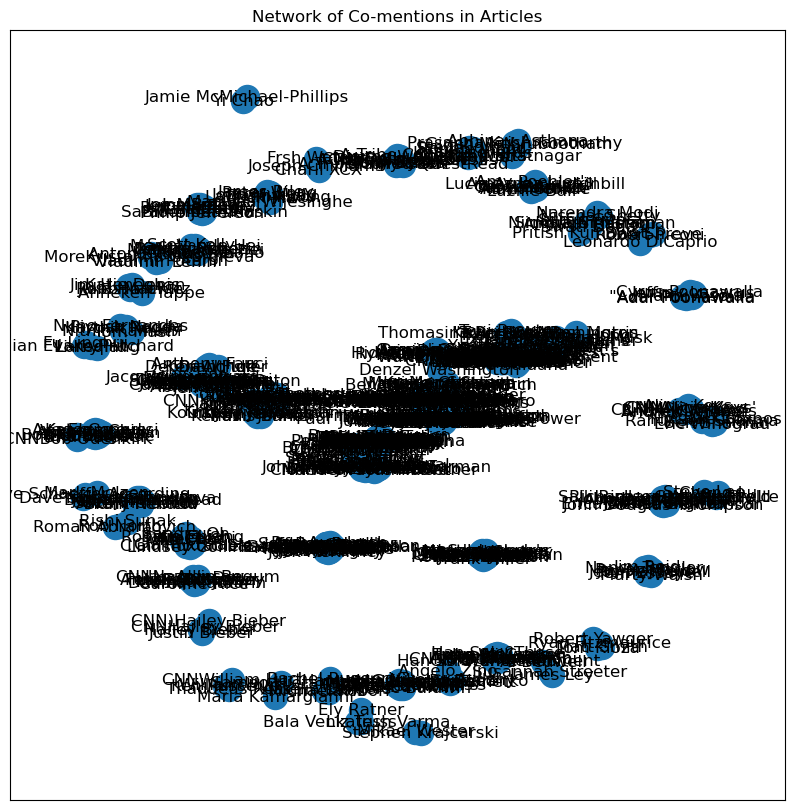

In [86]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Sample data: Replace this with your actual data

# Create a network graph
G = nx.Graph()

# Add edges between all pairs of names that are mentioned together
for article in clean_df:
    for name_pair in combinations(article, 2):
        G.add_edge(*name_pair)

# Draw the network
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True)
plt.title("Network of Co-mentions in Articles")
plt.show()

In [85]:
clean_df = check_network.dropna()
print(clean_df)

0                 [Steve Lee, Cheng Lu, Grayson Brulte]
1                 [Steve Lee, Cheng Lu, Grayson Brulte]
2                   [Mikael Wester, Stephen Krajcarski]
3                                            [Lit Fung]
4     [Callie Cox, Mychal Campos, Sen Sharma, Rahul ...
                            ...                        
95    [Desi Arnaz, Lucie Arnaz Luckinbill, Mark Monr...
96    [David Alvarez, Denzel Washington, Jessica Cha...
97    [David Alvarez, Denzel Washington, Jessica Cha...
98    [Ryusuke Hamaguchi, Ariana DeBose, Denzel Wash...
99    [Ryusuke Hamaguchi, Ariana DeBose, Denzel Wash...
Name: PERSON, Length: 97, dtype: object


In [87]:
import pandas as pd
import networkx as nx
from itertools import combinations


# Create a network graph
G = nx.Graph()

# Add edges between all pairs of names that are mentioned together, with a count
for article in clean_df:
    for name_pair in combinations(article, 2):
        if G.has_edge(*name_pair):
            G[name_pair[0]][name_pair[1]]['weight'] += 1
        else:
            G.add_edge(*name_pair, weight=1)

# Create a DataFrame to store co-mentions
columns = ['Name1', 'Name2', 'Co-mentions']
co_mentions_df = pd.DataFrame(columns=columns)

# Populate the DataFrame with data from the graph
for (name1, name2, data) in G.edges(data=True):
    co_mentions_df = co_mentions_df.append({'Name1': name1, 'Name2': name2, 'Co-mentions': data['weight']}, ignore_index=True)

# Display the DataFrame
print(co_mentions_df)

               Name1               Name2 Co-mentions
0          Steve Lee            Cheng Lu           2
1          Steve Lee      Grayson Brulte           2
2           Cheng Lu      Grayson Brulte           2
3      Mikael Wester  Stephen Krajcarski           1
4         Callie Cox       Mychal Campos           4
...              ...                 ...         ...
3329      Tôko Miura       Cassian Elwes           2
3330      Tôko Miura          Ruth Negga           2
3331  Daniel Craig's       Cassian Elwes           2
3332  Daniel Craig's          Ruth Negga           2
3333   Cassian Elwes          Ruth Negga           2

[3334 rows x 3 columns]


In [89]:
names_df = entity_final_df['PERSON'].dropna()

# Create a network graph
G = nx.Graph()

# Add edges between all pairs of names that are mentioned together, with a count
for article in names_df:
    for name_pair in combinations(article, 2):
        if G.has_edge(*name_pair):
            G[name_pair[0]][name_pair[1]]['weight'] += 1
        else:
            G.add_edge(*name_pair, weight=1)

# Create a DataFrame to store co-mentions
columns = ['Name1', 'Name2', 'Co-mentions']
co_mentions_df = pd.DataFrame(columns=columns)

# Populate the DataFrame with data from the graph
for (name1, name2, data) in G.edges(data=True):
    co_mentions_df = co_mentions_df.append({'Name1': name1, 'Name2': name2, 'Co-mentions': data['weight']}, ignore_index=True)

# Display the DataFrame
print(co_mentions_df)

                                      Name1                Name2 Co-mentions
0                                 Steve Lee             Cheng Lu           6
1                                 Steve Lee       Grayson Brulte           6
2                                  Cheng Lu       Grayson Brulte           6
3                             Mikael Wester   Stephen Krajcarski           3
4                                Callie Cox        Mychal Campos          14
...                                     ...                  ...         ...
300255                      Heidi Shierholz  everyoneElise Gould           1
300256          Hedwig and the Angry Inch's         Mark Taylor/           1
300257                      Musk OxTrebek's       Herd Godfather           1
300258                          Brad Norman        , Brad Norman           1
300259  offendDuane "Dog the Bounty Hunter"    remarksHulk Hogan           1

[300260 rows x 3 columns]


In [90]:
co_mentions_df.to_csv('comentions_df.csv',index=False)

In [97]:
(co_mentions_df['Co-mentions'] <= 2).value_counts()

False    161648
True     138612
Name: Co-mentions, dtype: int64

In [99]:
import pandas as pd
from collections import defaultdict
from itertools import chain

# Sample data
check_data = {
    'ORG': [['Virgin', 'Aurora', 'MIT'], ['Virgin', 'Aurora', 'MIT']],
    'GPE': [['Belarus', 'Dubai', 'Toronto'], ['Belarus', 'Dubai', 'Toronto']],
    'LOC': [['Europe'], ['Europe']],
    'PRODUCT': [['Oceanbird', 'ZEROe'], ['Model-T', 'Ironhand']],
    'NORP': [['Dutch', 'Canadian'], ['Dutch', 'Canadian']],
    'PERSON': [['Steve Lee', 'Cheng Lu', 'Grayson Brulte'], ['Steve Lee', 'Cheng Lu', 'Grayson Brulte']],
    'FAC': [None, None]
}

df = pd.DataFrame(check_data)

# Extract all unique names
unique_names = set(chain.from_iterable(df['PERSON']))

# Create a dictionary to store related entity counts for each person
related_entities = defaultdict(lambda: defaultdict(int))

# Iterate over each row and increment counts
for _, row in df.iterrows():
    for person in row['PERSON']:
        for column in df.columns:
            if column != 'PERSON':
                entities = row[column] or []  # Use an empty list if None
                for entity in entities:
                    related_entities[person][entity] += 1

# Sort and select the top 10 related entities for each person
top_related_entities = {person: sorted(entities.items(), key=lambda x: x[1], reverse=True)[:10] for person, entities in related_entities.items()}

# Create a new DataFrame
related_entities_df = pd.DataFrame([(person, [entity for entity, _ in entities]) for person, entities in top_related_entities.items()], columns=['Person', 'Top 10 Related Entities'])

print(related_entities_df)

           Person                            Top 10 Related Entities
0       Steve Lee  [Virgin, Aurora, MIT, Belarus, Dubai, Toronto,...
1        Cheng Lu  [Virgin, Aurora, MIT, Belarus, Dubai, Toronto,...
2  Grayson Brulte  [Virgin, Aurora, MIT, Belarus, Dubai, Toronto,...


In [107]:
# entire dataset:

df= entity_final_df

# Extract all unique names
unique_names = set(chain.from_iterable(names_df))

# Create a dictionary to store related entity counts for each person
related_entities = defaultdict(lambda: defaultdict(int))

for _, row in df.iterrows():
    if isinstance(row['PERSON'], list):
        for person in row['PERSON']:
            for column in df.columns:
                if column != 'PERSON':
                    entities = row[column]
                    if isinstance(entities, list):  # Check if entities is a list
                        for entity in entities:
                            related_entities[person][entity] += 1

# Sort and select the top 10 related entities for each person
top_related_entities = {person: sorted(entities.items(), key=lambda x: x[1], reverse=True)[:10] for person, entities in related_entities.items()}

# Create a new DataFrame
related_entities_df = pd.DataFrame([(person, [entity for entity, _ in entities]) for person, entities in top_related_entities.items()], columns=['Person', 'Top 10 Related Entities'])

print(related_entities_df)

                       Person  \
0                   Steve Lee   
1                    Cheng Lu   
2              Grayson Brulte   
3               Mikael Wester   
4          Stephen Krajcarski   
...                       ...   
18108             Leroy Brown   
18109            Texas Ranger   
18110  BataclanIsobel Bowdery   
18111       WATCHJimmy Kimmel   
18112       Email Blake Ellis   

                                 Top 10 Related Entities  
0      [Virgin, Aurora, MIT, University of Technology...  
1      [Virgin, Aurora, MIT, University of Technology...  
2      [Virgin, Aurora, MIT, University of Technology...  
3      [Bioservo, ABI Research, Ocado, General Motors...  
4      [Bioservo, ABI Research, Ocado, General Motors...  
...                                                  ...  
18108  [Glenview, Leyte, Navy, Ohio State University,...  
18109  [Ford's Theatre, Facebook, Ford, Skeptical Inq...  
18110  [Le Petit Cambodge, Casa Nostra, Islam, T for ...  
18111  [Newsm

In [109]:
related_entities_df.sample(20)

,Person,Top 10 Related Entities
903,Shivangi shibu,"[CNN, Sumy State University, @MEAIndia, Congo,..."
3323,Chief Dull Knife,"[The Northern Cheyenne, the Northern Cheyenne,..."
12204,Angela O'Connell,"[Soutphommasane, The Sydney Morning Herald, th..."
12318,Patrick Cottrell,"[Linfield University, Pacific University, IOC,..."
17321,Thomas Monconduit,"[Lorient, Monaco, Olympique de Marseille, St E..."
1064,Alexander Schallenberg,"[Germany, Europe, Austria, European, Austrian,..."
5093,MoreIsobel Bowdery,"[Bataclan, Rolling Stone, the United Nations',..."
9439,Anatoliy Chepiga,"[Kremlin, CNN, UK, Salisbury, London, Russia, ..."
15573,Andy Murray's,"[CNNBritain, Georgia, Los Cabos, Mexico, Paris..."
17611,Hans Niemann,"[Chess, Magnus Chess AS, Unibet, New in Chess,..."


In [115]:
# Sample data (replace with your actual DataFrame)
data_check_tag = {
    'ORG': [['Virgin', 'Aurora', 'MIT'], ['Virgin', 'Aurora', 'MIT']],
    'GPE': [['Belarus', 'Dubai', 'Toronto'], ['Belarus', 'Dubai', 'Toronto']],
    'LOC': [['Europe'], ['Europe']],
    'PRODUCT': [['Oceanbird', 'ZEROe'], ['Model-T', 'Ironhand']],
    'NORP': [['Dutch', 'Canadian'], ['Dutch', 'Canadian']],
    'PERSON': [['Steve Lee', 'Cheng Lu', 'Grayson Brulte'], ['Steve Lee', 'Cheng Lu', 'Grayson Brulte']],
    'FAC': [None, None]
}

df = pd.DataFrame(data_check_tag)

# Create a dictionary to store related entity counts for each person
related_entities = defaultdict(lambda: defaultdict(int))

# Iterate over each row and increment counts
for _, row in df.iterrows():
    for person in row['PERSON']:
        for column, entities in row.items():
            if column != 'PERSON' and isinstance(entities, list):
                for entity in entities:
                    related_entities[person][f'{column}: {entity}'] += 1

# Sort and select the top 10 related entities for each person
top_related_entities = {
    person: sorted(entities.items(), key=lambda x: x[1], reverse=True)[:10] 
    for person, entities in related_entities.items()
}

# Create a new DataFrame
related_entities_tag = pd.DataFrame([
    (person, [f'{tag} ' for tag, count in entities]) 
    for person, entities in top_related_entities.items()
], columns=['Person', 'Top 10 Related Entities'])

related_entities_tag['Top 10 Related Entities']

0    [ORG: Virgin , ORG: Aurora , ORG: MIT , GPE: B...
1    [ORG: Virgin , ORG: Aurora , ORG: MIT , GPE: B...
2    [ORG: Virgin , ORG: Aurora , ORG: MIT , GPE: B...
Name: Top 10 Related Entities, dtype: object

In [119]:
df= entity_final_df

# Extract all unique names
unique_names = set(chain.from_iterable(names_df))

# Create a dictionary to store related entity counts for each person
related_entities = defaultdict(lambda: defaultdict(int))

# Iterate over each row and increment counts
for _, row in df.iterrows():
    if isinstance(row['PERSON'], list):
        for person in row['PERSON']:
            for column, entities in row.items():
                if column != 'PERSON' and isinstance(entities, list):
                    for entity in entities:
                        related_entities[person][f'{column}: {entity}'] += 1

# Sort and select the top 10 related entities for each person
top_related_entities = {
    person: sorted(entities.items(), key=lambda x: x[1], reverse=True)[:10] 
    for person, entities in related_entities.items()
}

# Create a new DataFrame
related_entities_tag = pd.DataFrame([
    (person, [f'{tag} ' for tag, count in entities]) 
    for person, entities in top_related_entities.items()
], columns=['Person', 'Top 10 Related Entities'])

related_entities_tag


,Person,Top 10 Related Entities
0,Steve Lee,"[ORG: Virgin , ORG: Aurora , ORG: MIT , ORG: U..."
1,Cheng Lu,"[ORG: Virgin , ORG: Aurora , ORG: MIT , ORG: U..."
2,Grayson Brulte,"[ORG: Virgin , ORG: Aurora , ORG: MIT , ORG: U..."
3,Mikael Wester,"[ORG: ABI Research , ORG: Ocado , ORG: General..."
4,Stephen Krajcarski,"[ORG: ABI Research , ORG: Ocado , ORG: General..."
...,...,...
18108,Leroy Brown,"[ORG: Navy , ORG: Ohio State University , ORG:..."
18109,Texas Ranger,"[ORG: Ford's Theatre , ORG: Facebook , ORG: Fo..."
18110,BataclanIsobel Bowdery,"[ORG: Le Petit Cambodge , ORG: Islam , ORG: Ca..."
18111,WATCHJimmy Kimmel,"[ORG: Newsmax , ORG: GOP , ORG: Blxware.org , ..."


In [121]:
# Check if entire columns are exactly the same
are_same = related_entities_tag['Person'].equals(related_entities_df['Person'])
print(are_same)

True


In [123]:
related_entities_df['Entites_with_tag'] = related_entities_tag['Top 10 Related Entities']
related_entities_df

,Person,Top 10 Related Entities,Entites_with_tag
0,Steve Lee,"[Virgin, Aurora, MIT, University of Technology...","[ORG: Virgin , ORG: Aurora , ORG: MIT , ORG: U..."
1,Cheng Lu,"[Virgin, Aurora, MIT, University of Technology...","[ORG: Virgin , ORG: Aurora , ORG: MIT , ORG: U..."
2,Grayson Brulte,"[Virgin, Aurora, MIT, University of Technology...","[ORG: Virgin , ORG: Aurora , ORG: MIT , ORG: U..."
3,Mikael Wester,"[Bioservo, ABI Research, Ocado, General Motors...","[ORG: ABI Research , ORG: Ocado , ORG: General..."
4,Stephen Krajcarski,"[Bioservo, ABI Research, Ocado, General Motors...","[ORG: ABI Research , ORG: Ocado , ORG: General..."
...,...,...,...
18108,Leroy Brown,"[Glenview, Leyte, Navy, Ohio State University,...","[ORG: Navy , ORG: Ohio State University , ORG:..."
18109,Texas Ranger,"[Ford's Theatre, Facebook, Ford, Skeptical Inq...","[ORG: Ford's Theatre , ORG: Facebook , ORG: Fo..."
18110,BataclanIsobel Bowdery,"[Le Petit Cambodge, Casa Nostra, Islam, T for ...","[ORG: Le Petit Cambodge , ORG: Islam , ORG: Ca..."
18111,WATCHJimmy Kimmel,"[Newsmax, GOP, Blxware.org, Kohl's, Rice Unive...","[ORG: Newsmax , ORG: GOP , ORG: Blxware.org , ..."


In [124]:
related_entities_df.to_csv('related_entites.csv',index=False)

In [127]:
entity_final_df['Article_Sentiment'] = sentiment_df

In [131]:
# entity_final_df.to_csv('entity_with_sentiment.csv')

In [132]:
check_names_withs = entity_final_df[:20]
check_names_withs

,ORG,GPE,LOC,PRODUCT,NORP,PERSON,FAC,Article_Sentiment
0,"[Virgin, Aurora, MIT, University of Technology...","[Belarus, Dubai, Toronto, China, Germany, Dall...",[Europe],"[Oceanbird, ZEROe, Handle, Hyperloop, Model-T,...","[Dutch, Canadian, British, French, Japanese, N...","[Steve Lee, Cheng Lu, Grayson Brulte]",NaN,0.146590
1,"[Virgin, Aurora, MIT, University of Technology...","[Belarus, Dubai, Toronto, China, Germany, Dall...",[Europe],"[Model-T, Ironhand, Embark, Oceanbird, Hyperlo...","[Dutch, Canadian, British, French, Japanese, N...","[Steve Lee, Cheng Lu, Grayson Brulte]",NaN,0.146590
2,"[ABI Research, Ocado, General Motors, CNNA, GM...","[Tokyo, Taastrup, Denmark, London, Wuhan, China]",[Europe],"[Handle, Model-T, the Model-T, Spot, Ironhand,...","[Japanese, Swedish, British]","[Mikael Wester, Stephen Krajcarski]",NaN,0.055720
3,"[Nordic Harvest, Geek+, Ocado, Boston Dynamics...","[Tokyo, Taastrup, Denmark, London, Wuhan, Chin...",[Europe],"[Handle, the Model-T, Spot, The Autonomous Mob...","[Japanese, Chinese, British]",[Lit Fung],NaN,0.269196
4,"[CNN Business, MTS, AllianceBernstein, Winogra...","[Mexico, US, Poland, Turkey, South Korea, Phil...","[Central, Europe]",NaN,"[Westerners, Russian, Eastern European, BRICS]","[Callie Cox, Mychal Campos, Sen Sharma, Rahul ...",NaN,0.092919
5,"[CNN Business, MTS, AllianceBernstein, Winogra...","[Mexico, US, Poland, Turkey, South Korea, Phil...","[Central, Eastern European, Europe]",NaN,"[Westerners, Russian]","[Callie Cox, Mychal Campos, Sen Sharma, Rahul ...",NaN,0.092919
6,"[CNN Business, MTS, AllianceBernstein, Yandex,...","[Mexico, US, Poland, Turkey, South Korea, Phil...",[Europe],NaN,"[Russian, BRICS, Westerners, Eastern European,...","[Callie Cox, Mychal Campos, Sen Sharma, Rahul ...",NaN,0.092919
7,"[Gazprom Neft, Rosneft, SWIFT, Reuters, CNNThe...","[Russia, Belarus, Ukraine, The United Kingdom,...",NaN,NaN,"[European, Russian, Belarusian]","[Roman Abramovich, Rishi Sunak, Rob North]",NaN,0.111317
8,"[OVD-Info's, Russia Channel One, United Nation...","[US, Crimea, Mariupol, Ukraine, Russia, China,...",[Europe],NaN,"[Ukrainian, Russian, Russians]","[Vladimir Putin, Dmitry Zakhvatov, Maria Ovsya...",NaN,0.044204
9,"[CNNFox, Fox News, Facebook, The Committee to ...","[Afghanistan, Ukraine, Syria, UkraineNew, Iraq...","[Africa, the Middle East]",NaN,"[Ukrainian, American, Russian]","[Andriy Nebitov, Brent Renaud, Benjamin HallRe...",NaN,0.023086


In [143]:
check_names_withs['PERSON']

0                 [Steve Lee, Cheng Lu, Grayson Brulte]
1                 [Steve Lee, Cheng Lu, Grayson Brulte]
2                   [Mikael Wester, Stephen Krajcarski]
3                                            [Lit Fung]
4     [Callie Cox, Mychal Campos, Sen Sharma, Rahul ...
5     [Callie Cox, Mychal Campos, Sen Sharma, Rahul ...
6     [Callie Cox, Mychal Campos, Sen Sharma, Rahul ...
7            [Roman Abramovich, Rishi Sunak, Rob North]
8     [Vladimir Putin, Dmitry Zakhvatov, Maria Ovsya...
9     [Andriy Nebitov, Brent Renaud, Benjamin HallRe...
10    [Anton Siluanov, Vladimir Lenin, MoreKristalin...
11    [Callie Cox, Mychal Campos, Sen Sharma, Rahul ...
12    [Tom Kloza, Matt Smith, Ryan Fitzmaurice, Robe...
13        [Bala Venkatesh Varma, Ely Ratner, Liz Truss]
14                                                  NaN
15    [Donald Trump, Vladimir Putin, Brenda Goodman,...
16    [Vladimir Putin, Sascha Meinrath, Natalia Krap...
17       [Nick Clegg, Vladimir Putin, Mykhailo F

In [149]:
drop_df = check_names_withs[['PERSON','Article_Sentiment']]
drop_df = drop_df.dropna()

In [151]:
# Create a network graph
G = nx.Graph()

# Add edges between all pairs of names that are mentioned together, with a count and sentiment tracking
for index, row in drop_df.iterrows():
    persons = row['PERSON']
    sentiment = row['Article_Sentiment']

    for name_pair in combinations(persons, 2):
        if G.has_edge(*name_pair):
            G[name_pair[0]][name_pair[1]]['weight'] += 1
            G[name_pair[0]][name_pair[1]]['total_sentiment'] += sentiment
            G[name_pair[0]][name_pair[1]]['articles_count'] += 1
        else:
            G.add_edge(*name_pair, weight=1, total_sentiment=sentiment, articles_count=1)

# Create a DataFrame to store co-mentions
columns = ['Name1', 'Name2', 'Co-mentions', 'Average Sentiment']
co_mentions_df_s = pd.DataFrame(columns=columns)

# Populate the DataFrame with data from the graph
for (name1, name2, data) in G.edges(data=True):
    average_sentiment = data['total_sentiment'] / data['articles_count']
    co_mentions_df_s = co_mentions_df_s.append({
        'Name1': name1, 
        'Name2': name2, 
        'Co-mentions': data['weight'],
        'Average Sentiment': average_sentiment
    }, ignore_index=True)

# Display the DataFrame
print(co_mentions_df)

                                      Name1                Name2 Co-mentions
0                                 Steve Lee             Cheng Lu           6
1                                 Steve Lee       Grayson Brulte           6
2                                  Cheng Lu       Grayson Brulte           6
3                             Mikael Wester   Stephen Krajcarski           3
4                                Callie Cox        Mychal Campos          14
...                                     ...                  ...         ...
300255                      Heidi Shierholz  everyoneElise Gould           1
300256          Hedwig and the Angry Inch's         Mark Taylor/           1
300257                      Musk OxTrebek's       Herd Godfather           1
300258                          Brad Norman        , Brad Norman           1
300259  offendDuane "Dog the Bounty Hunter"    remarksHulk Hogan           1

[300260 rows x 3 columns]


In [152]:
co_mentions_df_s

,Name1,Name2,Co-mentions,Average Sentiment
0,Steve Lee,Cheng Lu,2,0.146590
1,Steve Lee,Grayson Brulte,2,0.146590
2,Cheng Lu,Grayson Brulte,2,0.146590
3,Mikael Wester,Stephen Krajcarski,1,0.055720
4,Callie Cox,Mychal Campos,4,0.092919
...,...,...,...,...
577,Tadashi Yanai,Vasco Cotovio,1,0.015630
578,Tadashi Yanai,Mark Thompson,1,0.015630
579,Arvind Krishna,Vasco Cotovio,1,0.015630
580,Arvind Krishna,Mark Thompson,1,0.015630


In [157]:
comention_sentiment = entity_final_df[['PERSON','Article_Sentiment']]
comention_sentiment = comention_sentiment.dropna()

# Create a network graph
G = nx.Graph()

# Add edges between all pairs of names that are mentioned together, with a count and sentiment tracking
for index, row in comention_sentiment.iterrows():
    persons = row['PERSON']
    sentiment = row['Article_Sentiment']

    for name_pair in combinations(persons, 2):
        if G.has_edge(*name_pair):
            G[name_pair[0]][name_pair[1]]['weight'] += 1
            G[name_pair[0]][name_pair[1]]['total_sentiment'] += sentiment
            G[name_pair[0]][name_pair[1]]['articles_count'] += 1
        else:
            G.add_edge(*name_pair, weight=1, total_sentiment=sentiment, articles_count=1)

# Create a DataFrame to store co-mentions
columns = ['Name1', 'Name2', 'Co-mentions', 'Average Sentiment']
co_mentions_df_s = pd.DataFrame(columns=columns)

# Populate the DataFrame with data from the graph
for (name1, name2, data) in G.edges(data=True):
    average_sentiment = data['total_sentiment'] / data['articles_count']
    co_mentions_df_s = co_mentions_df_s.append({
        'Name1': name1, 
        'Name2': name2, 
        'Co-mentions': data['weight'],
        'Average Sentiment': average_sentiment
    }, ignore_index=True)

# Display the DataFrame
print(co_mentions_df_s)

                                      Name1                Name2 Co-mentions  \
0                                 Steve Lee             Cheng Lu           6   
1                                 Steve Lee       Grayson Brulte           6   
2                                  Cheng Lu       Grayson Brulte           6   
3                             Mikael Wester   Stephen Krajcarski           3   
4                                Callie Cox        Mychal Campos          14   
...                                     ...                  ...         ...   
300255                      Heidi Shierholz  everyoneElise Gould           1   
300256          Hedwig and the Angry Inch's         Mark Taylor/           1   
300257                      Musk OxTrebek's       Herd Godfather           1   
300258                          Brad Norman        , Brad Norman           1   
300259  offendDuane "Dog the Bounty Hunter"    remarksHulk Hogan           1   

        Average Sentiment  
0          

In [158]:
# co_mentions_df_s.to_csv('comentions_sentiment.csv')

In [162]:
co_mentions_df_s.sort_values(by=['Co-mentions'], ascending=False)

,Name1,Name2,Co-mentions,Average Sentiment
973,Donald Trump,Joe Biden,152,0.061986
13053,Max Verstappen,Lewis Hamilton,107,0.186512
23511,Novak Djokovic,Roger Federer,95,0.141184
149558,Elizabeth II,Prince Philip,93,0.099967
164742,Prince Charles,Prince Harry,87,0.087003
...,...,...,...,...
218268,Charlotte Elizabeth Diana,Elizabeth Diana,1,0.092252
218279,Charlotte Elizabeth Diana,"Lilibet 'Lili' Diana Mountbatten-Windsor.uk, L...",1,0.050962
218280,Charlotte Elizabeth Diana,Elizabeth II's,1,0.050962
218283,Carole (Goldsmith) Middleton,familyPaddington Bear,1,0.085159


In [354]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

def co_mention_graph(df, person, cutoff):
    # Filter DataFrame based on cutoff and person
    sample_df = df[(df['Co-mentions'] > cutoff) & ((df['Name1'] == person) | (df['Name2'] == person))]

    # Create a new graph
    newsmakers = nx.Graph()

    # Add edges with weight and sentiment
    for index, row in sample_df.iterrows():
        newsmakers.add_edge(row['Name1'], row['Name2'], weight=row['Co-mentions'], sentiment=row['Average Sentiment'])

    # Node color based on average sentiment
    sentiment_values = {node: 0 for node in newsmakers.nodes()}
    sentiment_counts = {node: 0 for node in newsmakers.nodes()}
    
    for (n1, n2, d) in newsmakers.edges(data=True):
        sentiment_values[n1] += d['sentiment']
        sentiment_values[n2] += d['sentiment']
        sentiment_counts[n1] += 1
        sentiment_counts[n2] += 1

    average_sentiment = {node: sentiment_values[node] / sentiment_counts[node] if sentiment_counts[node] > 0 else 0 for node in newsmakers.nodes()}
    
    # Map sentiment values to colors
    min_sentiment = min(average_sentiment.values())
    max_sentiment = max(average_sentiment.values())
    norm = mcolors.TwoSlopeNorm(vmin=min_sentiment, vcenter=0, vmax=max_sentiment)
    node_colors = [plt.cm.RdYlGn(norm(average_sentiment[node])) for node in newsmakers.nodes()]

    pos = nx.spring_layout(newsmakers)  # Layout algorithm
    edge_labels = {(n1, n2): d['weight'] for n1, n2, d in newsmakers.edges(data=True)}

    plt.figure(figsize=(10, 8))
    nx.draw(newsmakers, pos, with_labels=True, font_size=8, node_size=800, node_color=node_colors, font_color='black', font_weight='bold', edge_color='gray')
    nx.draw_networkx_edge_labels(newsmakers, pos, edge_labels=edge_labels, font_color='red')

    plt.title('Co-mention Network')
    plt.show()

    return newsmakers

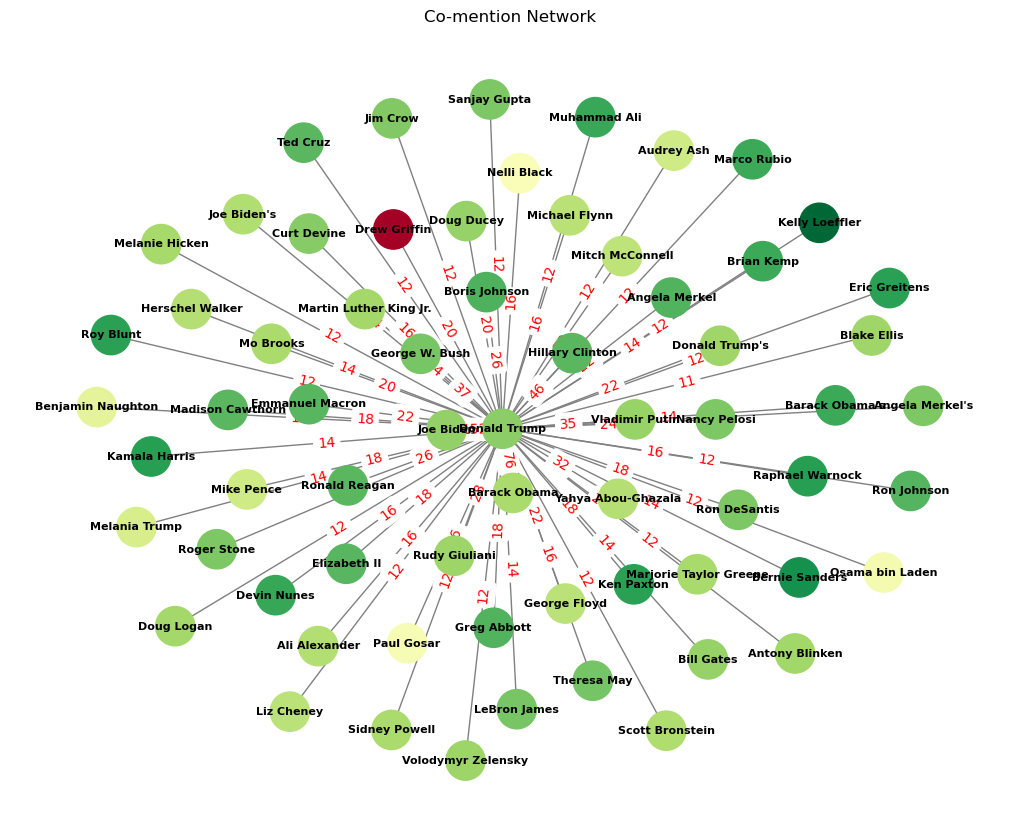

In [355]:
co_mention_graph(co_mentions_df_s,'Donald Trump', 10)

In [194]:
co_mentions_df_check = co_mentions_df_s[co_mentions_df_s['Co-mentions']>15]

In [188]:
co_mentions_df_more = co_mentions_df_s[co_mentions_df_s['Co-mentions']>4]

In [169]:
! pip install plotly

In [193]:
import networkx as nx
import plotly.graph_objects as go
import pandas as pd
import matplotlib.colors as mcolors
import plotly.offline as py


# Create a directed graph
newsmakers = nx.DiGraph()

# Add edges and nodes to the graph
for index, row in co_mentions_df_check.iterrows():
    newsmakers.add_edge(row['Name1'], row['Name2'], weight=row['Co-mentions'], sentiment=row['Average Sentiment'])

# Calculate average sentiment for each node
node_sentiment = {node: 0 for node in newsmakers.nodes()}
for (n1, n2, data) in newsmakers.edges(data=True):
    node_sentiment[n1] += data['sentiment']
    node_sentiment[n2] += data['sentiment']

# Normalize and map sentiment to color
min_sentiment = min(node_sentiment.values())
max_sentiment = max(node_sentiment.values())
norm = mcolors.TwoSlopeNorm(vmin=min_sentiment, vcenter=0, vmax=max_sentiment)
node_color = [mcolors.to_hex(plt.cm.RdYlGn(norm(node_sentiment[node]))) for node in newsmakers.nodes()]

# Position the nodes using a layout
pos = nx.spring_layout(newsmakers)

# Define make_edge function here...
def make_edge(x, y, text, width):

    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')

# ... (rest of your code to create edge_trace)
edge_trace = []
for edge in newsmakers.edges():

    if newsmakers.edges()[edge]['weight'] > 0:
        person= edge[0]
        person_2 = edge[1]

        x0, y0 = pos[person]
        x1, y1 = pos[person_2]

        text   = person + '--' + person_2 + ': ' + str(newsmakers.edges()[edge]['weight'])

        trace  = make_edge([x0, x1, None], [y0, y1, None], text,
                           0.3*newsmakers.edges()[edge]['weight']**1)

        edge_trace.append(trace)
                       

# Modify node_trace for coloring based on sentiment
node_trace = go.Scatter(
    x=[], y=[],
    text=[],
    textposition="top center",
    textfont_size=10,
    mode='markers+text',
    hoverinfo='none',
    marker=dict(
        color=node_color,  # Set the node colors
        line=None,
        size=10  # You can adjust the size here
    )
)

# Add node positions and labels to node_trace
for node, (x, y) in pos.items():
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['text'] += tuple(['<b>' + node + '</b>'])

layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)


fig = go.Figure(layout = layout)

for trace in edge_trace:
    fig.add_trace(trace)

fig.add_trace(node_trace)

fig.update_layout(showlegend = False)

fig.update_xaxes(showticklabels = False)

fig.update_yaxes(showticklabels = False)

fig.show()
py.plot(fig, filename='newsmakers_network.html')


In [211]:
def plot_top_related(person_name, df, top_n=20):
    # Filter for rows involving the specified person
    related_rows = df[(df['Name1'] == person_name)]

    # Sort by 'Co-mentions' and take top N rows
    top_related = related_rows.nlargest(top_n, 'Co-mentions')

    # Create a directed graph
    newsmakers = nx.DiGraph()

    # Add edges and nodes to the graph from the top_related DataFrame
    for _, row in top_related.iterrows():
        newsmakers.add_edge(row['Name1'], row['Name2'], weight=row['Co-mentions'], sentiment=row['Average Sentiment'])

    # Calculate average sentiment for each node
    node_sentiment = {node: 0 for node in newsmakers.nodes()}
    for (n1, n2, data) in newsmakers.edges(data=True):
        node_sentiment[n1] += data['sentiment']
        node_sentiment[n2] += data['sentiment']

    # Normalize and map sentiment to color
    min_sentiment = min(node_sentiment.values())
    max_sentiment = max(node_sentiment.values())
    
    # Ensure vmin < vcenter < vmax for TwoSlopeNorm
    vcenter = 0
    vmin = min_sentiment  # Ensure vmin is less than vcenter
    vmax = max_sentiment   # Ensure vmax is greater than vcenter

    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    node_color = [mcolors.to_hex(plt.cm.RdYlGn(norm(node_sentiment[node]))) for node in newsmakers.nodes()]

    # Position the nodes using a layout
    pos = nx.spring_layout(newsmakers)


    # Create edge traces
    edge_trace = []
    for edge in newsmakers.edges():
        if newsmakers.edges()[edge]['weight'] > 0:
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            text = edge[0] + '--' + edge[1] + ': ' + str(newsmakers.edges()[edge]['weight'])
            trace = make_edge([x0, x1, None], [y0, y1, None], text, 0.1 * newsmakers.edges()[edge]['weight']**1)
            edge_trace.append(trace)

    # Create node trace
    node_trace = go.Scatter(
        x=[], y=[],
        text=[],
        textposition="top center",
        textfont_size=10,
        mode='markers+text',
        hoverinfo='none',
        marker=dict(
            color=node_color,  # Set the node colors
            size=10  # Adjust the size here
        )
    )

    # Add node positions and labels to node_trace
    for node, (x, y) in pos.items():
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])
        node_trace['text'] += tuple(['<b>' + node + '</b>'])

    # Define the layout
    layout = go.Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'
    )

    # Create the figure and add traces
    fig = go.Figure(layout=layout)
    for trace in edge_trace:
        fig.add_trace(trace)
    fig.add_trace(node_trace)

    # Update layout settings
    fig.update_layout(showlegend=False, xaxis_showgrid=False, yaxis_showgrid=False, xaxis_zeroline=False, yaxis_zeroline=False)
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)

    # Show the figure
    fig.show()

# Call the function with a person's name and the DataFrame
plot_top_related('Donald Trump', co_mentions_df_check, top_n=20)

In [277]:
co_mentions_df_more['Co-mentions'] = co_mentions_df_more['Co-mentions'].astype(int)

In [313]:
def make_edge(x, y, text, width):
    '''Creates a scatter trace for the edge between x's and y's with given width and text'''
    return go.Scatter(x=x, y=y, line=dict(width=width, color='cornflowerblue'),
                      hoverinfo='text', text=([text]), mode='lines')

def plot_top_related(person_name, df, top_n):
    
    
    # Filter for rows involving the specified person
    related_rows = df[(df['Name1'] == person_name) | (df['Name2'] == person_name)]

    # Sort by 'Co-mentions' and take top N rows
    top_related = related_rows.nlargest(top_n, 'Co-mentions')

    # Create a directed graph
    newsmakers = nx.DiGraph()

    # Add edges and nodes to the graph from the top_related DataFrame
    for _, row in top_related.iterrows():
        # Only include edges where one of the nodes is the specified person
        if row['Name1'] == person_name or row['Name2'] == person_name:
            newsmakers.add_edge(row['Name1'], row['Name2'], weight=row['Co-mentions'], sentiment=row['Average Sentiment'])
    
    
#     # Filter for rows involving the specified person
#     related_rows = df[(df['Name1'] == person_name)| (df['Name2'] == person)]

#     # Sort by 'Co-mentions' and take top N rows
#     top_related = related_rows.nlargest(top_n, 'Co-mentions')

#     # Create a directed graph
#     newsmakers = nx.DiGraph()

#     # Add edges and nodes to the graph from the top_related DataFrame
#     for _, row in top_related.iterrows():
#         newsmakers.add_edge(row['Name1'], row['Name2'], weight=row['Co-mentions'], sentiment=row['Average Sentiment'])

    node_sentiment = {node: 0 for node in newsmakers.nodes()}
    for (n1, n2, data) in newsmakers.edges(data=True):
        node_sentiment[n1] += data['sentiment']
        node_sentiment[n2] += data['sentiment']

    # Find min and max sentiment values
    min_sentiment = min(node_sentiment.values())
    max_sentiment = max(node_sentiment.values())
    print(min_sentiment)
    print(max_sentiment)
    norm = mcolors.TwoSlopeNorm(vmin=min_sentiment, vcenter = 0, vmax=max_sentiment)
    node_color = [mcolors.to_hex(plt.cm.RdYlGn(norm(node_sentiment[node]))) for node in newsmakers.nodes()]


    # Position the nodes using a layout
    pos = nx.spring_layout(newsmakers)

    # Create edge traces
    edge_trace = []
    for edge in newsmakers.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        # Include co-mention count in the hover text
        text = f'{edge[0]} -- {edge[1]}: Co-mentions: {newsmakers.edges()[edge]["weight"]}'
        trace = make_edge([x0, x1, None], [y0, y1, None], text, 0.2 * newsmakers.edges()[edge]['weight']**1)
        edge_trace.append(trace)

    # Create node trace
    node_trace = go.Scatter(
        x=[], y=[],
        text=[],
        textposition="top center",
        textfont_size=10,
        mode='markers+text',
        hoverinfo='none',
        marker=dict(
            color=node_color,  # Set the node colors
            size=10  # Adjust the size here
        )
    )

    # Add node positions and labels to node_trace
    for node, (x, y) in pos.items():
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])
        node_trace['text'] += tuple(['<b>' + node + '</b>'])

    # Define the layout
    layout = go.Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'
    )

    # Create the figure and add traces
    fig = go.Figure(layout=layout)
    for trace in edge_trace:
        fig.add_trace(trace)
    fig.add_trace(node_trace)

    # Update layout settings
    fig.update_layout(showlegend=False, xaxis_showgrid=False, yaxis_showgrid=False, xaxis_zeroline=False, yaxis_zeroline=False)
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)

    # Show the figure
    fig.show()
    
plot_top_related('Donald Trump', co_mentions_df_more, top_n=20)

-0.013418767255076685
1.2134675725276263


In [503]:
co_mentions_df_more.nlargest(100, 'Co-mentions')

,Name1,Name2,Co-mentions,Average Sentiment
973,Donald Trump,Joe Biden,152,0.061986
13053,Max Verstappen,Lewis Hamilton,107,0.186512
23511,Novak Djokovic,Roger Federer,95,0.141184
149558,Elizabeth II,Prince Philip,93,0.099967
23508,Novak Djokovic,Rafael Nadal,87,0.143406
...,...,...,...,...
25191,CNNNovak Djokovic,Roger Federer,33,0.157015
120132,Oprah Winfrey,Prince Charles,33,0.074841
149560,Elizabeth II,Prince Philips,33,0.088235
152875,Prince Edward,Prince Andrew,33,0.077387


In [507]:
def plot_top_related(person_name, df, top_n):
    
    def make_edge(x, y, text, width):
        return go.Scatter(x=x, y=y, line=dict(width=width, color='cornflowerblue'),
                          hoverinfo='text', text=([text]), mode='lines')

    # Filter and sort rows
    related_rows = df[(df['Name1'] == person_name) | (df['Name2'] == person_name)]
    top_related = related_rows.nlargest(top_n, 'Co-mentions')

    # Create graph
    newsmakers = nx.DiGraph()
    for _, row in top_related.iterrows():
        if row['Name1'] == person_name or row['Name2'] == person_name:
            newsmakers.add_edge(row['Name1'], row['Name2'], weight=row['Co-mentions'], sentiment=row['Average Sentiment'])

    # Calculate average sentiment
    sentiment_sum = {node: 0 for node in newsmakers.nodes()}
    sentiment_count = {node: 0 for node in newsmakers.nodes()}
    for (n1, n2, data) in newsmakers.edges(data=True):
        sentiment_sum[n1] += data['sentiment']
        sentiment_sum[n2] += data['sentiment']
        sentiment_count[n1] += 1
        sentiment_count[n2] += 1

    node_sentiment = {node: (sentiment_sum[node] / sentiment_count[node] if sentiment_count[node] > 0 else 0) for node in newsmakers.nodes()}

    # Map sentiment to color
    min_sentiment = min(node_sentiment.values())
    max_sentiment = max(node_sentiment.values())
    
    if min_sentiment > 0:
        min_sentiment = -1 * max_sentiment
    
    norm = mcolors.TwoSlopeNorm(vmin=min_sentiment, vcenter = 0, vmax=max_sentiment)
    node_color = [mcolors.to_hex(plt.cm.RdYlGn(norm(node_sentiment[node]))) for node in newsmakers.nodes()]

    # Position nodes
    pos = nx.spring_layout(newsmakers)

    # Create edge traces
    edge_trace = []
    for edge in newsmakers.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        text = f'{edge[0]} -- {edge[1]}: Co-mentions: {newsmakers.edges()[edge]["weight"]}'
        trace = make_edge([x0, x1, None], [y0, y1, None], text, 0.2 * newsmakers.edges()[edge]['weight']**1)
        edge_trace.append(trace)

    # Create node trace
    node_trace = go.Scatter(x=[], y=[], text=[], textposition="top center", textfont_size=10, mode='markers+text',
                            hoverinfo='none', marker=dict(color=node_color, size=10))

    # Add node positions and labels
    for node, (x, y) in pos.items():
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])
        node_trace['text'] += tuple(['<b>' + node + '</b>'])
        
    # Create color scale for the colorbar
    cmap = plt.cm.RdYlGn
    color_scale = [mcolors.to_hex(cmap(i)) for i in range(256)]
    color_scale = [color_scale[int(i * 255)] for i in norm([min_sentiment, 0, max_sentiment])]

    # Define layout
    layout = go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

    # Create figure and add traces
    fig = go.Figure(layout=layout)
    for trace in edge_trace:
        fig.add_trace(trace)
    fig.add_trace(node_trace)

    # Update layout settings
    fig.update_layout(showlegend=False, xaxis_showgrid=False, yaxis_showgrid=False, xaxis_zeroline=False, yaxis_zeroline=False)
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)

    # Show figure
    fig.show()

# Example usage
plot_top_related('Lionel Messi', co_mentions_df_s, top_n=50)

In [486]:
names = co_mentions_df_s['Name1'].value_counts().index

In [490]:
pattern = r"[^\w\s]"
pattern = r"\b[\w'-]+(?:\s+[\w'-]+)*\s*[^A-Za-z\s'-]\s*[\w'-]+(?:\s+[\w'-]+)*\b"

co_mentions_df_s['Name1'] = co_mentions_df_s['Name1'].apply(lambda x: re.sub(pattern, '', x)) 
co_mentions_df_s['Name2'] = co_mentions_df_s['Name2'].apply(lambda x: re.sub(pattern, '', x)) 

In [493]:
import re

pattern = r"\b[\w'-]+(?:\s+[\w'-]+)*\s*[^A-Za-z\s'-]\s*[\w'-]+(?:\s+[\w'-]+)*\b"

names = co_mentions_df_s['Name2'].value_counts().index

for name in list(names):
    if re.search(pattern, name):
        print(f"Special name found: {name}")


In [381]:
len(set(diff_names))

93

In [438]:
co_mentions_df_s['Name2']

0                         Steve Lee
1                         Steve Lee
2                          Cheng Lu
3                     Mikael Wester
4                        Callie Cox
                    ...            
300255              Heidi Shierholz
300256    Hedwig and the Angry Inch
300257                Musk OxTrebek
300258                  Brad Norman
300259                            "
Name: Name2, Length: 300260, dtype: object

In [382]:
diff_names

['Alberto Ginés López',
 'Anouk Vergé-Dépré',
 'Lara González Ortega',
 'Armand "Mondo" Duplantis',
 'Jorge Ureña',
 'Cristina Ouviña',
 'Marie-Zélia Lafont',
 'Sandra Sánchez',
 'Julio César La Cruz',
 'Cristian Nápoles',
 'Pablo Carreño Busta',
 'Sunisa "Suni" Lee',
 'Shaolin Sándor Liu',
 'Ireen Wüst',
 'George H.W, Bush',
 'Marjorie K. Eastman',
 'Earvin "Magic" Johnson',
 'John C. Reilly',
 'Dwight D. Eisenhower',
 'Nat "King" Cole',
 'George W. Bush',
 'Ivan Pešić',
 'Han Solo?These',
 'Lilibet "Lili" Diana Mountbatten-Windsor',
 'Eric S.C. Manning',
 'George P. Bush',
 'CNN)Simone Biles',
 'Queen Arrow"Law',
 'CNN)Dolly Parton',
 'A.J. Minter',
 'Bernhard "Bery" Glaser',
 'Tôko Miura',
 'Han Solo?entertainment',
 'Raymond [Babbitt',
 '22Sylvia Gathoni',
 'John F. Kennedy',
 'K. Parker',
 'J.D. Vance',
 'CNN)Novak Djokovic',
 'CNN)Cristiano Ronaldo',
 'CNN)Lionel Messi',
 'CNN)Janja Garnbret',
 'Eliott C. McLaughlin',
 'Zoe Saldaña',
 'Robbie Balenger.sport',
 'John D. Sutter',
 

In [429]:
# Regex pattern to match names with brackets or numbers
pattern = r"[\[\]\(\)\{\},\d\?]"

# Filtering names that don't match the pattern
cleaned_names = [name for name in diff_names if re.search(pattern, name)]

# Display cleaned names
for name in cleaned_names:
    print(name)

George H.W, Bush
Han Solo?These
CNN)Simone Biles
CNN)Dolly Parton
Han Solo?entertainment
Raymond [Babbitt
22Sylvia Gathoni
CNN)Novak Djokovic
CNN)Cristiano Ronaldo
CNN)Lionel Messi
CNN)Janja Garnbret
CNN)Masai Ujiri
CNN)Rafael Nadal
CNN)Naomi Osaka
CNN)Serena Williams
CNN)Alban Zinsou
CNN)Steph Curry
CNN)Tiger Woods
CNN)Hailey Bieber
CNN)Nelly Korda
CNN)LeBron James
2020Christian Eriksen
Marcus] Rashford
Martin Luther King, Jr.
CNN)Simone Biles
CNN)Alban Zinsou
Sean (Foley
Raymond [Babbitt
Han Solo?entertainment
CNN)Cristiano Ronaldo
CNN)Rafael Nadal
CNN)Masai Ujiri
Han Solo?These
CNN)Hailey Bieber
CNN)Nelly Korda
22Sylvia Gathoni
George H.W, Bush


In [470]:
co_mentions_df_s = co_mentions_df_s[['Name1','Name2','Co-mentions','Average Sentiment']]

In [473]:
co_mentions_df_s

,Name1,Name2,Co-mentions,Average Sentiment
0,Steve Lee,Cheng Lu,6,0.146590
1,Steve Lee,Grayson Brulte,6,0.146590
2,Cheng Lu,Grayson Brulte,6,0.146590
3,Mikael Wester,Stephen Krajcarski,3,0.055720
4,Callie Cox,Mychal Campos,14,0.092919
...,...,...,...,...
300255,Heidi Shierholz,everyoneElise Gould,1,0.185362
300256,Hedwig and the Angry Inchs,Mark Taylor,1,0.097816
300257,Musk OxTrebeks,Herd Godfather,1,0.215547
300258,Brad Norman,Brad Norman,1,0.157619


In [472]:
pattern = r"[^\w\s]"

co_mentions_df_s['Name1'] = co_mentions_df_s['Name1'].apply(lambda x: re.sub(pattern, '', x)) 
co_mentions_df_s['Name2'] = co_mentions_df_s['Name2'].apply(lambda x: re.sub(pattern, '', x)) 


In [412]:
co_mentions_df_s

,Name1,Name2,Co-mentions,Average Sentiment
0,Steve Lee,Steve Lee,6,0.146590
1,Steve Lee,Steve Lee,6,0.146590
2,Cheng Lu,Cheng Lu,6,0.146590
3,Mikael Wester,Mikael Wester,3,0.055720
4,Callie Cox,Callie Cox,14,0.092919
...,...,...,...,...
300255,Heidi Shierholz,Heidi Shierholz,1,0.185362
300256,Hedwig and the Angry Inch,Hedwig and the Angry Inch,1,0.097816
300257,Musk OxTrebek,Musk OxTrebek,1,0.215547
300258,Brad Norman,Brad Norman,1,0.157619


In [411]:
co_mentions_df_s.to_csv('comentions_sentiment_cleaned_names.csv')

In [494]:
co_mentions_df_more = co_mentions_df_s[co_mentions_df_s['Co-mentions']>5]

In [444]:
# co_mentions_df_more.to_csv('comentions_sentiment_cleaned_names_5.csv')

In [499]:
names = co_mentions_df_more['Name2'].value_counts().index

pattern = r"[^\w\s]"


for name in list(names):
    if re.search(pattern, name):
        print(f"Special name found: {name}")

In [496]:
co_mentions_df_more

,Name1,Name2,Co-mentions,Average Sentiment
0,Steve Lee,Cheng Lu,6,0.146590
1,Steve Lee,Grayson Brulte,6,0.146590
2,Cheng Lu,Grayson Brulte,6,0.146590
4,Callie Cox,Mychal Campos,14,0.092919
5,Callie Cox,Sen Sharma,14,0.092919
...,...,...,...,...
299427,Aidan Hutchinson,Bryce Young,6,0.184092
299428,Aidan Hutchinson,Kenny Pickett,6,0.184092
299437,CJ Stroud,Bryce Young,6,0.184092
299438,CJ Stroud,Kenny Pickett,6,0.184092


In [497]:
co_mentions_df_more.to_csv('comentions_sentiment_cleaned_names_6.csv')